# ECE 435/535 LAB 7

## Name: Amir Reza Vazifeh


### Objectives:  

We will use a linear SVM, kernel SVM, and logistic regression to classify MNIST digits into c=10 classes. The best performance among these methods will lower bound what we expect to achive using a Neural Network. Hence it will provide a benchmark for the next round of methods: Multinomial Softmax Regression, a one hidden layer neural network, a Multilayer feedforward neural network, and a convolutional neural network.
  
The SVM and logistic regression a naturally binary classifiers. But the methods can be used to perform multi-class classification using the one-versus-the-rest method. As the name suggests this trains $c$ binary classifiers, each of which distinguishes one class from the rest. The final classification is made by resolving conflicting classifications (no need to go into the details).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from time import time
import datetime
%matplotlib inline

## Kernel-SVM on MNIST

**1.1)** First, import the provided subsets of the MNIST dataset:  
MNISTcwtrain1000.npy and  MNISTcwtest100.npy

Normalize the scalar data values to the range [0,1].


In [ ]:
train_data = np.load('/content/sample_data/MNISTcwtrain1000-1.npy')
train_data = train_data.astype(dtype='float64')
test_data = np.load('/content/sample_data/MNISTcwtest100-1.npy')
test_data = test_data.astype(dtype='float64')

train_data = train_data/255.0
test_data = test_data/255.0
print('training data: ', train_data.shape)
print('testing data: ', test_data.shape)

training data:  (784, 10000)
testing data:  (784, 1000)


For the training data, the first 1000 columns are the digit of 0, the next 1000 columns are the digit of 1, and so on, up to digit 9. For the testing data, the first 100 columns are the digit of 0, the next 100 columns are the digit of 1, and so on, up to digit 9. We show the first example in each class of the testing data in the following cell.

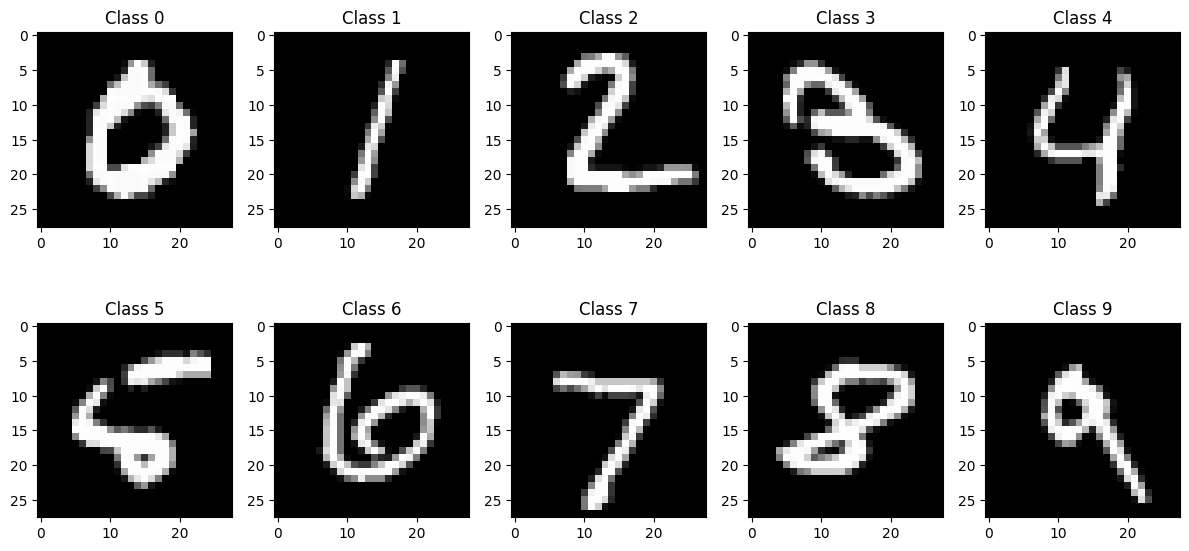

In [ ]:
# Initialize the subplot
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

# Loop through class labels
for i, class_label in enumerate([0, 100, 200, 300, 400, 500, 600, 700, 800, 900]):

  original_image = test_data[:, class_label]

  # Reshape the image to 28x28
  original_image = original_image.reshape(28, 28)

  # Plotting in the ith subplot
  axs[i // 5, i % 5].imshow(original_image.T, cmap='gray')
  axs[i // 5, i % 5].set_title(f'Class {int(class_label/100)}')

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()

**1.2)** The SVM can be used to classify multiclass data. One-versus-the-rest is the default when you call Scikit to learn an SVM with multi-class labels.

Train a one-versus-rest SVM using a linear kernel and C=0.1.   
Report classification accuracy on the training and testing data. (Use sklearn's built-in commands for training and testing)

In [ ]:
# This code is provided
from sklearn import svm
from sklearn.metrics import accuracy_score

start = time()
#-----------------------------------
# Your code here

# Extract labels
train_labels = np.arange(10).repeat(1000)
test_labels = np.arange(10).repeat(100)

# Train the SVM
linear_svm = svm.SVC(kernel='linear', C=0.1, decision_function_shape='ovr')
linear_svm.fit(train_data.T, train_labels)

# Predictions on training data
train_predictions = linear_svm.predict(train_data.T)
train_accuracy = accuracy_score(train_labels, train_predictions)
print("Training Accuracy:", train_accuracy)

# Predictions on testing data
test_predictions = linear_svm.predict(test_data.T)
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Testing Accuracy:", test_accuracy)



#------------------------------------
# This code is provided
end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

Training Accuracy: 0.9739
Testing Accuracy: 0.921
Estimated running time:0:00:08.706222


**1.3)** Now, do the same using an SVM with 'rbf' (Gaussian) kernel. Search over C in the interval [0.005,0.1] and 'gamma' in the interval [0.005, 0.1] and report the best test accuracy (use sklearn's built-in commands). Hint: In order to get a feeling for selecting an appropriate value for gamma, take a look at http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

This explanation is provided in the mentioned website.

gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’:

* if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
* if ‘auto’, uses 1 / n_features
* if float, must be non-negative.

In [ ]:
# This code is provided
start = time()
#--------------------------------------------
# Your code here

# Define the parameter values
C_values_rbf = [0.005, 0.01, 0.05, 0.1]
gamma_values = [0.005, 0.01, 0.05, 0.1]

# Initialize a matrix to store accuracy values
accuracy_matrix_train = np.zeros((len(C_values_rbf), len(gamma_values)))
accuracy_matrix_test = np.zeros((len(C_values_rbf), len(gamma_values)))


# Perform the manual grid search
for i, C in enumerate(C_values_rbf):
    for j, gamma in enumerate(gamma_values):

      # Create the SVM with 'rbf' kernel
      svm_rbf = svm.SVC(kernel='rbf', C=C, gamma=gamma, decision_function_shape='ovr')

      # Train the model
      svm_rbf.fit(train_data.T, train_labels)

      # Predictions on training data
      train_predictions = svm_rbf.predict(train_data.T)
      train_accuracy = accuracy_score(train_labels, train_predictions)

      # Predictions on testing data
      test_predictions = svm_rbf.predict(test_data.T)
      test_accuracy = accuracy_score(test_labels, test_predictions)

      # Printing for keeping a record
      print("For C = ", C, "and gamma = ", gamma, " --> Training accuracy = ", train_accuracy, " and testing accuracy = ", test_accuracy)

      # Store the accuracies in the matrix
      accuracy_matrix_train[i, j] = train_accuracy
      accuracy_matrix_test[i, j] = test_accuracy

#---------------------------------------------
# This code is provided
end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

For C =  0.005 and gamma =  0.005  --> Training accuracy =  0.7609  and testing accuracy =  0.714
For C =  0.005 and gamma =  0.01  --> Training accuracy =  0.8121  and testing accuracy =  0.766
For C =  0.005 and gamma =  0.05  --> Training accuracy =  0.7247  and testing accuracy =  0.654
For C =  0.005 and gamma =  0.1  --> Training accuracy =  0.4703  and testing accuracy =  0.292
For C =  0.01 and gamma =  0.005  --> Training accuracy =  0.8071  and testing accuracy =  0.766
For C =  0.01 and gamma =  0.01  --> Training accuracy =  0.8378  and testing accuracy =  0.794
For C =  0.01 and gamma =  0.05  --> Training accuracy =  0.728  and testing accuracy =  0.658
For C =  0.01 and gamma =  0.1  --> Training accuracy =  0.4703  and testing accuracy =  0.292
For C =  0.05 and gamma =  0.005  --> Training accuracy =  0.8942  and testing accuracy =  0.871
For C =  0.05 and gamma =  0.01  --> Training accuracy =  0.9159  and testing accuracy =  0.88
For C =  0.05 and gamma =  0.05  --> 

In [ ]:
# Find the indices of the maximum accuracy
best_indices = np.unravel_index(np.argmax(accuracy_matrix_test), accuracy_matrix_test.shape)
best_C = C_values_rbf[best_indices[0]]
best_gamma = gamma_values[best_indices[1]]
best_test_accuracy = accuracy_matrix_test[best_indices]

print("Best Test Accuracy is equal to", best_test_accuracy, "when C =", best_C, " and Gamma =", best_gamma)

Best Test Accuracy is equal to 0.899 when C = 0.1  and Gamma = 0.01


**1.3)** Now, do the same using l2 regularized logistic regression. For multi-class data, scikit learn defaults to one-versus-the-rest classification. The regularization parameter $C$ plays the role of $1/\lambda.$ Smaller values of $C$ mean stronger regularization. Search over three or fours values in the interval [0.01, 1] to find the best testing performance.

In [ ]:
# This code is provided
from sklearn.linear_model import LogisticRegression
start = time()
#--------------------------------------------
# Your code here

# Define the parameter values
C_values = [0.01, 0.05, 0.1, 0.5, 0.7, 1.0]

# Initialize a matrix to store accuracy values
accuracy_matrix_logistic_training = np.zeros(len(C_values))
accuracy_matrix_logistic_testing = np.zeros(len(C_values))


# Perform the manual grid search
for i, C in enumerate(C_values):

    # Create the logistic regression model with L2 regularization
    logistic_regression = LogisticRegression(C=C, penalty='l2', max_iter=1000, solver='lbfgs', multi_class='ovr')

    # Train the model
    logistic_regression.fit(train_data.T, train_labels)

    # Predictions on training data
    train_predictions_logistic = logistic_regression.predict(train_data.T)
    train_accuracy_logistic = accuracy_score(train_labels, train_predictions_logistic)

    # Predictions on testing data
    test_predictions_logistic = logistic_regression.predict(test_data.T)
    test_accuracy_logistic = accuracy_score(test_labels, test_predictions_logistic)

    # Printing for keeping a record
    print("For C = ", C, " --> Training accuracy = ", train_accuracy_logistic, " and testing accuracy = ", test_accuracy_logistic)

    # Store the accuracy in the matrix
    accuracy_matrix_logistic_training[i] = train_accuracy_logistic
    accuracy_matrix_logistic_testing[i] = test_accuracy_logistic

#---------------------------------------------
# This code is provided
end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

For C =  0.01  --> Training accuracy =  0.9039  and testing accuracy =  0.873
For C =  0.05  --> Training accuracy =  0.9227  and testing accuracy =  0.885
For C =  0.1  --> Training accuracy =  0.9292  and testing accuracy =  0.888
For C =  0.5  --> Training accuracy =  0.9437  and testing accuracy =  0.887
For C =  0.7  --> Training accuracy =  0.9465  and testing accuracy =  0.888
For C =  1.0  --> Training accuracy =  0.9491  and testing accuracy =  0.887
Estimated running time:0:00:40.370193


In [ ]:
# Find the index of the maximum accuracy
best_index_logistic = np.argmax(accuracy_matrix_logistic_testing)
best_C_logistic = C_values[best_index_logistic]
best_test_accuracy_logistic = accuracy_matrix_logistic_testing[best_index_logistic]

print("Best C for Logistic Regression:", best_C_logistic)
print("Best Test Accuracy for Logistic Regression:", best_test_accuracy_logistic)



Best C for Logistic Regression: 0.1
Best Test Accuracy for Logistic Regression: 0.888


**1.4)** With what accuracy can the best of the above clasifiers predict the classes of the 1,000 test images? This is the benchmark to beat.


ANS:

*  For linear SVM, the best test accuracy is equal to 0.921 when C = 0.1.
*   For SVM with gaussian kernel, the best test accuracy is equal to 0.899 when C = 0.1  and Gamma = 0.01.
*   For logistic regression, the best test accuracy is 0.888 when C = 0.1.

So the best possible test accuracy within these models is equal to linear SVM with test accuracy = 0.921 when C = 0.1.


